In [10]:
import numpy as np 
import pandas as pd 
import os 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6


In [11]:
display (os.getcwd())

'/content'

In [12]:
#os.chdir ('D:\\ML Training Feb All Notes and Projects\\PRJ Stock Price Prediction\\')
#display (os.getcwd())


In [13]:
df =pd.read_csv("prices.csv", header=0)
display (df)


,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...
246976,2012-02-02,MCD,98.260002,98.620003,98.260002,98.820000,3984000.0
246977,2012-02-02,MCHP,37.529999,37.689999,37.529999,38.320000,2455100.0
246978,2012-02-02,MCK,82.730003,82.330002,81.750000,82.739998,1670900.0
246979,2012-02-02,MCO,37.799999,37.459999,37.380001,38.029999,1425400.0


In [14]:
print(df.shape)

(246981, 7)


In [15]:
print(df.columns)

Index(['date', 'symbol', 'open', 'close', 'low', 'high', 'volume'], dtype='object')


In [16]:
df.symbol.value_counts()

JCI      526
GE       526
GOOGL    526
GOOG     526
GLW      526
        ... 
PRGO     525
CHTR     525
LYB      447
GM       304
WLTW     251
Name: symbol, Length: 471, dtype: int64

In [17]:
df.symbol.unique()

array(['WLTW', 'A', 'AAL', 'AAP', 'AAPL', 'ABC', 'ABT', 'ACN', 'ADBE',
       'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET',
       'AFL', 'AGN', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALK', 'ALL',
       'ALXN', 'AMAT', 'AME', 'AMG', 'AMGN', 'AMP', 'AMT', 'AMZN', 'AN',
       'ANTM', 'AON', 'APA', 'APC', 'APD', 'APH', 'ARNC', 'ATVI', 'AVB',
       'AVGO', 'AVY', 'AWK', 'AXP', 'AYI', 'AZO', 'BA', 'BAC', 'BAX',
       'BBBY', 'BBT', 'BBY', 'BCR', 'BDX', 'BEN', 'BHI', 'BIIB', 'BK',
       'BLK', 'BLL', 'BMY', 'BSX', 'BWA', 'BXP', 'C', 'CA', 'CAG', 'CAH',
       'CAT', 'CB', 'CBG', 'CBS', 'CCI', 'CCL', 'CELG', 'CERN', 'CF',
       'CHD', 'CHK', 'CHRW', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA',
       'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COH',
       'COL', 'COO', 'COP', 'COST', 'CPB', 'CRM', 'CSCO', 'CSX', 'CTAS',
       'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DD', 'DE',
       'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA', 'DISCK', 

In [18]:
display(df.symbol.unique().shape)

(471,)

In [19]:
df.symbol.unique()[0:20]

array(['WLTW', 'A', 'AAL', 'AAP', 'AAPL', 'ABC', 'ABT', 'ACN', 'ADBE',
       'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET',
       'AFL', 'AGN'], dtype=object)

In [20]:
print(len(df.symbol.values))

246981


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246981 entries, 0 to 246980
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    246981 non-null  object 
 1   symbol  246981 non-null  object 
 2   open    246981 non-null  float64
 3   close   246981 non-null  float64
 4   low     246980 non-null  float64
 5   high    246980 non-null  float64
 6   volume  246980 non-null  float64
dtypes: float64(5), object(2)
memory usage: 13.2+ MB


In [22]:
df.describe()

,open,close,low,high,volume
count,246981.000000,246981.000000,246980.000000,246980.000000,2.469800e+05
mean,52.594576,52.611023,51.958757,53.209709,6.995296e+06
std,54.158609,54.150666,53.536426,54.740958,1.668473e+07
min,0.850000,0.860000,0.830000,0.880000,0.000000e+00
25%,26.860001,26.870001,26.500000,27.190001,1.470200e+06
50%,41.450001,41.450001,40.950001,41.919998,3.087650e+06
75%,61.959999,61.980000,61.250000,62.630001,6.553925e+06
max,665.031159,668.281154,660.621128,670.251161,8.596434e+08


In [23]:
df.isnull().sum()

date      0
symbol    0
open      0
close     0
low       1
high      1
volume    1
dtype: int64

In [24]:
df.date.unique()

array(['2016-01-05 00:00:00', '2016-01-06 00:00:00',
       '2016-01-07 00:00:00', ..., '2012-02-01', '2012-02-01 00:00:00',
       '2012-02-02'], dtype=object)

In [25]:
pd.DataFrame(df.date.unique())

,0
0,2016-01-05 00:00:00
1,2016-01-06 00:00:00
2,2016-01-07 00:00:00
3,2016-01-08 00:00:00
4,2016-01-11 00:00:00
...,...
1297,2012-01-31
1298,2012-01-31 00:00:00
1299,2012-02-01
1300,2012-02-01 00:00:00


In [26]:
df.duplicated().sum()

0

In [27]:
#Calling the file in nyse named securities.csv, It has the company details 
comp_info = pd.read_csv('securities.csv')
comp_info


,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",31-03-1964,1800
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",31-12-2012,1551152
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",06-07-2011,1467373
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",31-08-2015,718877
...,...,...,...,...,...,...,...,...
500,YHOO,Yahoo Inc.,reports,Information Technology,Internet Software & Services,"Sunnyvale, California",NaN,1011006
501,YUM,Yum! Brands Inc,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",06-10-1997,1041061
502,ZBH,Zimmer Biomet Holdings,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",NaN,1136869
503,ZION,Zions Bancorp,reports,Financials,Regional Banks,"Salt Lake City, Utah",NaN,109380


In [28]:
comp_info["Ticker symbol"].nunique()

505

In [29]:
comp_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Ticker symbol            505 non-null    object
 1   Security                 505 non-null    object
 2   SEC filings              505 non-null    object
 3   GICS Sector              505 non-null    object
 4   GICS Sub Industry        505 non-null    object
 5   Address of Headquarters  505 non-null    object
 6   Date first added         307 non-null    object
 7   CIK                      505 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 31.7+ KB


In [30]:
comp_info.isnull().sum()

Ticker symbol                0
Security                     0
SEC filings                  0
GICS Sector                  0
GICS Sub Industry            0
Address of Headquarters      0
Date first added           198
CIK                          0
dtype: int64

In [31]:
comp_info.describe()

,CIK
count,5.050000e+02
mean,7.074490e+05
std,5.144375e+05
min,1.800000e+03
25%,8.631200e+04
50%,8.310010e+05
75%,1.075531e+06
max,1.659166e+06


In [32]:
comp_info.loc[comp_info.Security.str.startswith('Face') , :]

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
181,FB,Facebook,reports,Information Technology,Internet Software & Services,"Menlo Park, California",23-12-2013,1326801


In [33]:
comp_info.loc[comp_info.Security.str.startswith('Acc') , :]

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",06-07-2011,1467373


In [34]:
comp_plot = comp_info.loc[(comp_info["Security"] == 'Yahoo Inc.') | (comp_info["Security"] == 'Xerox Corp.') | (comp_info["Security"] == 'Adobe Systems Inc')
              | (comp_info["Security"] == 'Microsoft Corp.') | (comp_info["Security"] == 'Adobe Systems Inc') 
              | (comp_info["Security"] == 'Facebook') | (comp_info["Security"] == 'Goldman Sachs Group') , ["Ticker symbol"] ]["Ticker symbol"] 
print(comp_plot)


6      ADBE
181      FB
212      GS
306    MSFT
496     XRX
500    YHOO
Name: Ticker symbol, dtype: object


In [35]:
for i in comp_plot:
    print (i)


ADBE
FB
GS
MSFT
XRX
YHOO


In [36]:
def plotter(code):
    # Function used to create graphs for 6 companies 
    global closing_stock ,opening_stock
    #creating plot of all 6 company for opening and closing stock  total 12 graphs
    # Below statement create 2X2 empty chart 
    f, axs = plt.subplots(2,2,figsize=(15,8))
    # total 12 graphs
    # creating plot opening prize of particular company
    plt.subplot(212)
    #taking name of the company as code, get all records related to one company
    company = df[df['symbol']==code]
    #taking the values of one company and taking its open column values to 1D array
    company = company.open.values.astype('float32')
    #reshaping the open stock value from 1D  to 2D .
    company = company.reshape(-1, 1)
    # putting the value of company in opening_stock 
    opening_stock = company
    # plotting the data with green graph between "Time" and "prices vs time"
    
    plt.grid(True)# enalbling the grid in graph
    plt.xlabel('Time') # setting X axis as time
    # setting Y axis as company name + open stock prices
    plt.ylabel(code + " open stock prices") 
    plt.title('prices Vs Time') # setting title
    plt.plot(company , 'g') # calling the graph with green graph line
    
    # creating plot closing prize of particular company
    plt.subplot(211)
    #taking name of the company as code
    company_close = df[df['symbol']==code]
    #taking the values of one company and taking its close column values
    company_close = company_close.close.values.astype('float32')
    #reshaping the open column value in 1D and calling it closing_stock
   # -1 for unknown dimension
    company_close = company_close.reshape(-1, 1)
    # putting company_close value in closing_stock 
    closing_stock = company_close
    # plotting the data graph between "Time" and "prices vs time"
    plt.xlabel('Time') # setting x axis as time
    plt.ylabel(code + " close stock prices")# setting y axis as company name + open stock prices
    plt.title('prices Vs Time') # setting title as price vs time
    plt.grid(True) # enabling the grid in graph
    plt.plot(company_close , 'b') #creating the data graph in blue graph line
    plt.show() # calling the graph



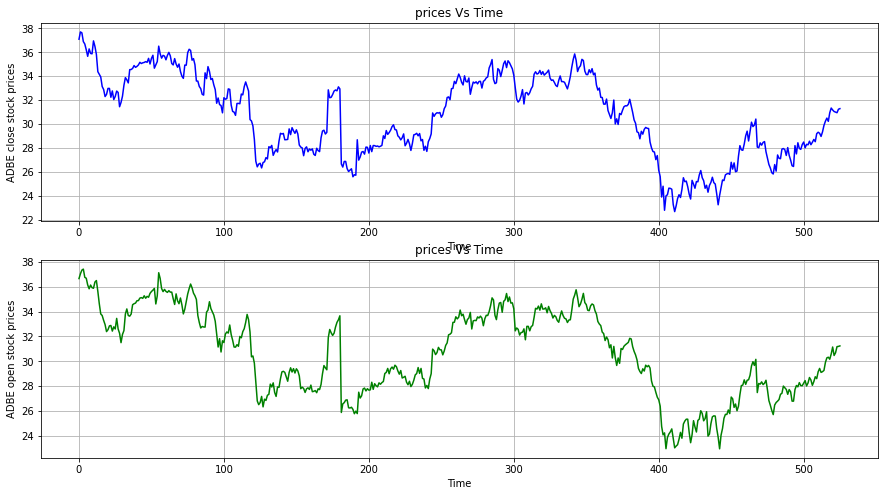

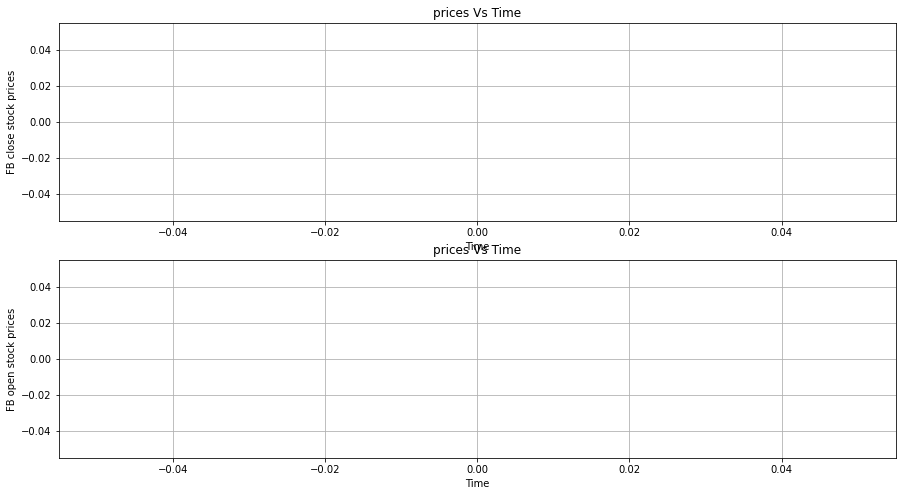

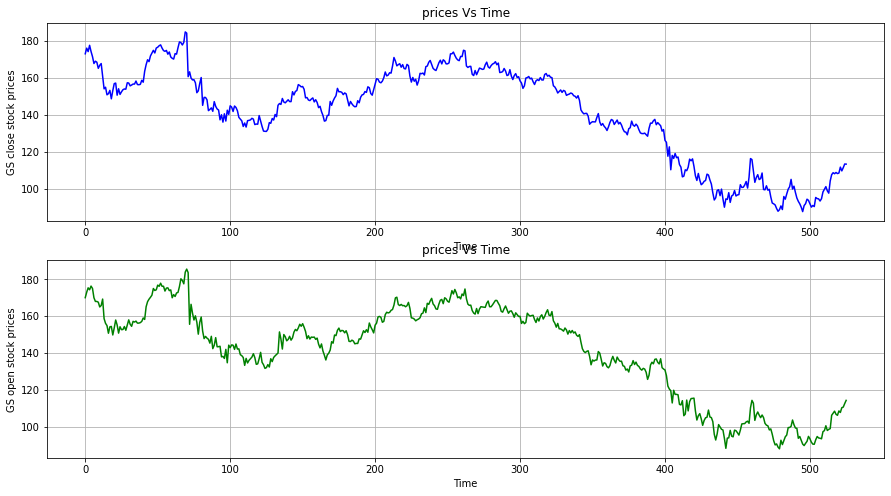

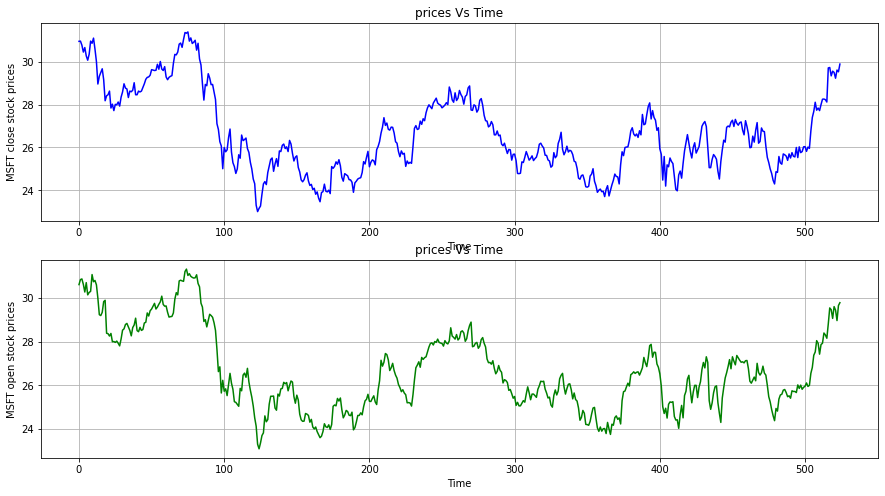

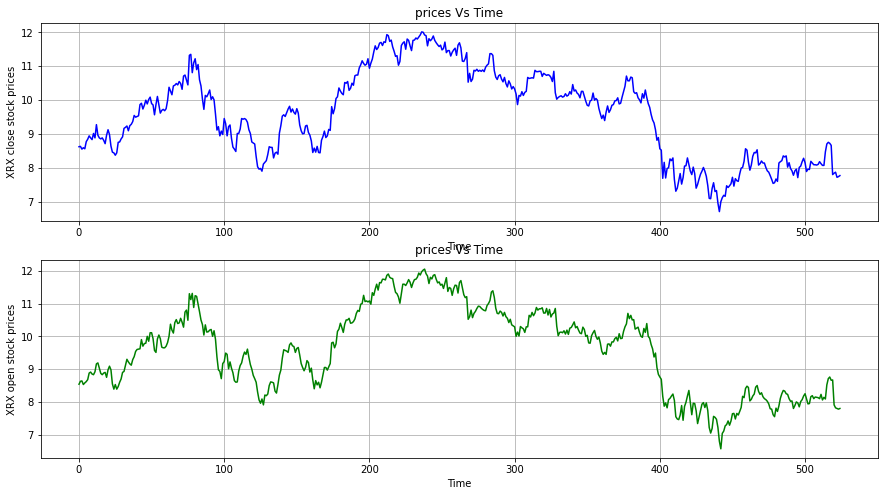

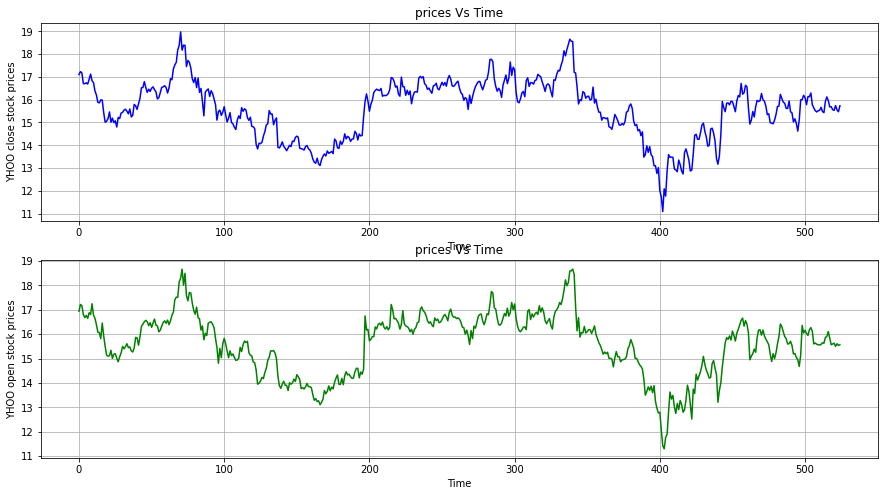

In [37]:
for i in comp_plot:
    plotter(i)


In [38]:
stocks= np.array (df[df.symbol.isin (['YHOO'])].close)
print(stocks)


[17.1      17.23     17.17     16.700001 16.700001 16.74     16.68
 16.9      17.120001 16.82     16.75     16.379999 16.200001 15.88
 15.86     15.99     15.98     15.44     15.01     15.05     15.17
 15.46     15.01     15.19     14.99     15.07     14.8      15.22
 15.17     15.41     15.44     15.54     15.58     15.49     15.38
 15.59     15.24     15.31     15.79     15.73     15.57     15.81
 16.059999 16.52     16.530001 16.790001 16.530001 16.32     16.459999
 16.360001 16.5      16.559999 16.440001 16.34     16.030001 16.09
 16.32     16.540001 16.559999 16.610001 16.530001 16.290001 16.51
 16.92     16.870001 17.35     17.52     17.639999 18.18     18.379999
 18.969999 18.17     18.389999 18.379999 17.450001 17.719999 17.639999
 17.389999 16.92     16.75     16.969999 16.530001 16.950001 16.32
 16.49     15.92     15.29     16.33     16.41     16.469999 16.139999
 16.389999 16.27     16.030001 15.79     15.1      15.48     15.54
 15.31     15.45     15.69     15.34     15.02

In [39]:
display (stocks.shape)

(525,)

In [40]:
stocks = stocks.reshape(len(stocks) , 1)
print (stocks.shape)
print(stocks)


(525, 1)
[[17.1     ]
 [17.23    ]
 [17.17    ]
 [16.700001]
 [16.700001]
 [16.74    ]
 [16.68    ]
 [16.9     ]
 [17.120001]
 [16.82    ]
 [16.75    ]
 [16.379999]
 [16.200001]
 [15.88    ]
 [15.86    ]
 [15.99    ]
 [15.98    ]
 [15.44    ]
 [15.01    ]
 [15.05    ]
 [15.17    ]
 [15.46    ]
 [15.01    ]
 [15.19    ]
 [14.99    ]
 [15.07    ]
 [14.8     ]
 [15.22    ]
 [15.17    ]
 [15.41    ]
 [15.44    ]
 [15.54    ]
 [15.58    ]
 [15.49    ]
 [15.38    ]
 [15.59    ]
 [15.24    ]
 [15.31    ]
 [15.79    ]
 [15.73    ]
 [15.57    ]
 [15.81    ]
 [16.059999]
 [16.52    ]
 [16.530001]
 [16.790001]
 [16.530001]
 [16.32    ]
 [16.459999]
 [16.360001]
 [16.5     ]
 [16.559999]
 [16.440001]
 [16.34    ]
 [16.030001]
 [16.09    ]
 [16.32    ]
 [16.540001]
 [16.559999]
 [16.610001]
 [16.530001]
 [16.290001]
 [16.51    ]
 [16.92    ]
 [16.870001]
 [17.35    ]
 [17.52    ]
 [17.639999]
 [18.18    ]
 [18.379999]
 [18.969999]
 [18.17    ]
 [18.389999]
 [18.379999]
 [17.450001]
 [17.719999]
 [1

In [41]:
from sklearn.preprocessing import MinMaxScaler
#scaling features between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1)) 
stocks = scaler.fit_transform(stocks) 
display (stocks)


array([[0.76269045],
       [0.77918792],
       [0.7715737 ],
       [0.71192915],
       [0.71192915],
       [0.71700517],
       [0.70939095],
       [0.73730974],
       [0.76522865],
       [0.72715745],
       [0.7182742 ],
       [0.67131976],
       [0.64847737],
       [0.6078681 ],
       [0.60533003],
       [0.62182749],
       [0.62055845],
       [0.55203053],
       [0.49746199],
       [0.50253813],
       [0.51776656],
       [0.5545686 ],
       [0.49746199],
       [0.52030463],
       [0.49492392],
       [0.50507621],
       [0.47081224],
       [0.52411174],
       [0.51776656],
       [0.54822342],
       [0.55203053],
       [0.56472088],
       [0.56979703],
       [0.55837571],
       [0.54441631],
       [0.57106606],
       [0.52664981],
       [0.53553306],
       [0.59644678],
       [0.58883256],
       [0.56852799],
       [0.59898485],
       [0.63071061],
       [0.68908638],
       [0.69035554],
       [0.72335047],
       [0.69035554],
       [0.663

In [42]:
print (stocks.shape) 

(525, 1)


In [43]:
train = int(len(stocks) * 0.80)
print (train)


420


In [44]:
test = len(stocks) - train 
print (test)


105


In [45]:
train = stocks[0:train]
display (train.shape)
print(train)


(420, 1)

[[0.76269045]
 [0.77918792]
 [0.7715737 ]
 [0.71192915]
 [0.71192915]
 [0.71700517]
 [0.70939095]
 [0.73730974]
 [0.76522865]
 [0.72715745]
 [0.7182742 ]
 [0.67131976]
 [0.64847737]
 [0.6078681 ]
 [0.60533003]
 [0.62182749]
 [0.62055845]
 [0.55203053]
 [0.49746199]
 [0.50253813]
 [0.51776656]
 [0.5545686 ]
 [0.49746199]
 [0.52030463]
 [0.49492392]
 [0.50507621]
 [0.47081224]
 [0.52411174]
 [0.51776656]
 [0.54822342]
 [0.55203053]
 [0.56472088]
 [0.56979703]
 [0.55837571]
 [0.54441631]
 [0.57106606]
 [0.52664981]
 [0.53553306]
 [0.59644678]
 [0.58883256]
 [0.56852799]
 [0.59898485]
 [0.63071061]
 [0.68908638]
 [0.69035554]
 [0.72335047]
 [0.69035554]
 [0.66370567]
 [0.68147204]
 [0.66878194]
 [0.68654831]
 [0.6941624 ]
 [0.67893422]
 [0.66624374]
 [0.62690376]
 [0.63451785]
 [0.66370567]
 [0.69162458]
 [0.6941624 ]
 [0.70050783]
 [0.69035554]
 [0.65989869]
 [0.68781735]
 [0.73984781]
 [0.73350276]
 [0.79441634]
 [0.81598995]
 [0.83121825]
 [0.89974631]
 [0.92512689]
 [1.        ]
 [0.89

In [46]:
test = stocks[len(train) : ]
display(test.shape)
display (test)



(105, 1)

array([[0.28680207],
       [0.22588835],
       [0.2309645 ],
       [0.31979699],
       [0.42512696],
       [0.4302031 ],
       [0.40228432],
       [0.40228432],
       [0.43908635],
       [0.48223356],
       [0.49238585],
       [0.44670056],
       [0.41497467],
       [0.36421324],
       [0.36802035],
       [0.45939092],
       [0.46446706],
       [0.43781731],
       [0.39340107],
       [0.29568532],
       [0.26395942],
       [0.30964471],
       [0.42766503],
       [0.61294424],
       [0.57868028],
       [0.55583763],
       [0.60279195],
       [0.60533003],
       [0.5939087 ],
       [0.61421328],
       [0.6116752 ],
       [0.58502545],
       [0.55583763],
       [0.61548231],
       [0.64593917],
       [0.63832508],
       [0.71319793],
       [0.65355338],
       [0.66116747],
       [0.70304565],
       [0.6941624 ],
       [0.57741124],
       [0.48730971],
       [0.50888331],
       [0.55710667],
       [0.52664981],
       [0.58375642],
       [0.619

In [47]:
#creating function to create trainX,testX and target(trainY, testY)
def process_data(data , n_features):
    dataX, dataY = [], [] # creating data for dataset and dividing inta X,Y
    for i in range(len(data)-n_features):
        # taking i range from total size- 3 
        a = data[i:(i+n_features), 0]
        # Here a is value of data from i to i+ n_features, ie two values and put it in dataX 
        dataX.append(a) #putting a in dataX
        #here dataY takes the value of data of i + n_features
        dataY.append(data[i + n_features, 0])
        # putting i+ n_features in  dataY
    return np.array(dataX), np.array(dataY)
# returning dataX and dataY in array




In [48]:
n_features = 2
# Here we create train X, Train Y and test X, Test Y data where trainX, testX has two value is each block

trainX, trainY = process_data(train, n_features)
print(trainX.shape , trainY.shape)



(418, 2) (418,)


In [49]:
testX, testY = process_data(test, n_features)
print (testX.shape , testY.shape)


(103, 2) (103,)


In [50]:
stocksX, stocksY = process_data(stocks, n_features)
print (stocksX.shape , stocksY.shape)


(523, 2) (523,)


In [51]:
display (trainX[:10])

array([[0.76269045, 0.77918792],
       [0.77918792, 0.7715737 ],
       [0.7715737 , 0.71192915],
       [0.71192915, 0.71192915],
       [0.71192915, 0.71700517],
       [0.71700517, 0.70939095],
       [0.70939095, 0.73730974],
       [0.73730974, 0.76522865],
       [0.76522865, 0.72715745],
       [0.72715745, 0.7182742 ]])

In [52]:
display (trainY[:10])

array([0.7715737 , 0.71192915, 0.71192915, 0.71700517, 0.70939095,
       0.73730974, 0.76522865, 0.72715745, 0.7182742 , 0.67131976])

In [53]:
# reshaping trainX and testX to use in deep learning model
trainX = trainX.reshape(trainX.shape[0] , 1 ,trainX.shape[1])
display (trainX.shape)


(418, 1, 2)

In [54]:
testX = testX.reshape(testX.shape[0] , 1 ,testX.shape[1])
display (testX.shape)


(103, 1, 2)

In [55]:
stocksX= stocksX.reshape(stocksX.shape[0] , 1 ,stocksX.shape[1])
display (stocksX.shape)


(523, 1, 2)

In [67]:
# helps us do mathematical operations
import math 
# for setting layers one by one neural layer in model 
from keras.models import Sequential 
# types of layers
from keras.layers import Dense , BatchNormalization , Dropout , Activation 
# types of RNN
from keras.layers import LSTM , GRU 
#It puts the data in between given range to set data before putting layer
from sklearn.preprocessing import MinMaxScaler 
# In this method the errors in column is squared and then mean is found 
from sklearn.metrics import mean_squared_error 
# Optimizers used
#from keras.optimizers import Adam , SGD , RMSprop



In [68]:
#Checkpointing the model when required and using other call-backs.
filepath="stock_weights1.hdf5"
from keras.callbacks import ReduceLROnPlateau , ModelCheckpoint
# ReduceLROnPlateau- This reduce the learning rate when the matrix stop improving or  too close to reduce overfitting
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.1, epsilon=0.0001, patience=1, verbose=1)
#This check point will stop processing, if the model is not improving.
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='max')


In [69]:
# creating model for training data using sequential to give series wise output between layers
model = Sequential()
# GRU or Gated Recurrent Unit used for matrix manipulation within Recurrent layer
#This is the input Layer 
model.add(GRU(256 , input_shape = (1 , n_features) , return_sequences=True))
#dropout is used to remove overfitting data on each layer of neural network
model.add(Dropout(0.4))
#Long Short Term Memory is a type of RNN specially used for time series problems
model.add(LSTM(256))
#dropout is used to remove overfitting data on each layer of neural network
model.add(Dropout(0.4))
#Dense layer are fully connected neural networks 
model.add(Dense(64 ,  activation = 'relu'))
#This is the output Layer, Output is only one neuron 
model.add(Dense(1))
#for getting the details of our models
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 1, 256)            199680    
                                                                 
 dropout (Dropout)           (None, 1, 256)            0         
                                                                 
 lstm (LSTM)                 (None, 256)               525312    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense (Dense)               (None, 64)                16448     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 741,505
Trainable params: 741,505
Non-trai

In [70]:
# Selecting the loss measurement metrics and optimizer for our model, to find out mean square error
model.compile(loss='mean_squared_error', optimizer=Adam(lr = 0.0005) , metrics = ['mean_squared_error'])



In [71]:
# fitting the data i.e training the trainX, to relate to trainY
# epochs is the times each data in send to fit
# batch size is the size of information send at a time
# validation_data is the validation or data used for testing 
history = model.fit(trainX, trainY, epochs=100 , batch_size = 128 , 
          callbacks = [checkpoint , lr_reduce] , validation_data = (testX,testY))    

Epoch 1/100
3/4 [=====================>........] - ETA: 0s - loss: 0.3550 - mean_squared_error: 0.3550 
Epoch 1: val_loss improved from -inf to 0.24883, saving model to stock_weights1.hdf5
4/4 [==============================] - 6s 393ms/step - loss: 0.3501 - mean_squared_error: 0.3501 - val_loss: 0.2488 - val_mean_squared_error: 0.2488 - lr: 5.0000e-04
Epoch 2/100
3/4 [=====================>........] - ETA: 0s - loss: 0.2767 - mean_squared_error: 0.2767
Epoch 2: val_loss did not improve from 0.24883
4/4 [==============================] - 0s 38ms/step - loss: 0.2731 - mean_squared_error: 0.2731 - val_loss: 0.1796 - val_mean_squared_error: 0.1796 - lr: 5.0000e-04
Epoch 3/100
3/4 [=====================>........] - ETA: 0s - loss: 0.1961 - mean_squared_error: 0.1961
Epoch 3: val_loss did not improve from 0.24883
4/4 [==============================] - 0s 34ms/step - loss: 0.1924 - mean_squared_error: 0.1924 - val_loss: 0.1058 - val_mean_squared_error: 0.1058 - lr: 5.0000e-04
Epoch 4/100
3/4

In [72]:

test_pred = model.predict(testX)
display (test_pred [:10])


array([[0.45848137],
       [0.43668655],
       [0.47148505],
       [0.5455387 ],
       [0.5891047 ],
       [0.58061093],
       [0.56955343],
       [0.58338803],
       [0.61427736],
       [0.6353229 ]], dtype=float32)

In [73]:
test_pred = scaler.inverse_transform(test_pred)
display (test_pred [:10])


array([[14.702833 ],
       [14.53109  ],
       [14.805303 ],
       [15.3888445],
       [15.732144 ],
       [15.665214 ],
       [15.578081 ],
       [15.687098 ],
       [15.930505 ],
       [16.096344 ]], dtype=float32)

In [74]:
testY = testY.reshape(testY.shape[0] , 1)
#Converting reshaped list in 1D array so that it will be efficient in plotting
testY = scaler.inverse_transform(testY)
# taking testY from 1 to 10
display (testY[:10])


array([[12.91],
       [13.61],
       [14.44],
       [14.48],
       [14.26],
       [14.26],
       [14.55],
       [14.89],
       [14.97],
       [14.61]])

In [75]:
from sklearn.metrics import r2_score
r2_score(testY,test_pred)


-1.1943450611403708

Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices


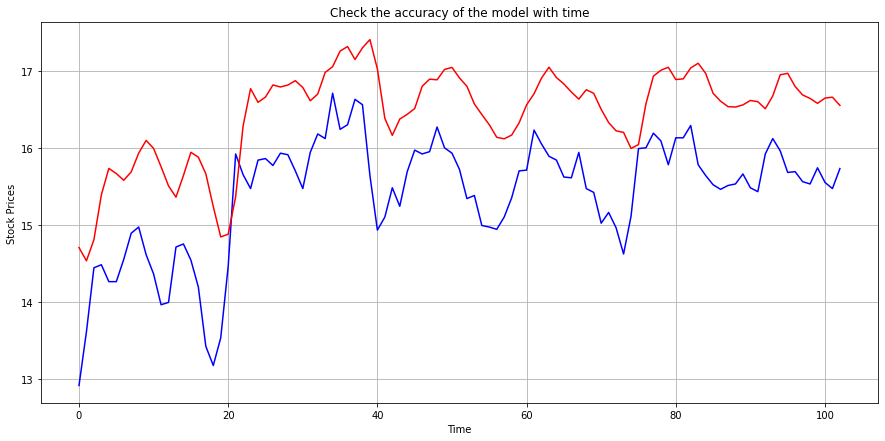

In [76]:
# Ploting the graph of stock prices with time
print("Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices")
plt.rcParams["figure.figsize"] = (15,7)
# testY is the blue line
plt.plot(testY , 'b')
# pred is the red line
plt.plot(test_pred , 'r')
# Setting x axis as time
plt.xlabel('Time')
# Setting y axis as stock prices
plt.ylabel('Stock Prices')
# setting title 
plt.title('Check the accuracy of the model with time')
# enabling grids in graph 
plt.grid(True)
# it call the graph with labels, titles, lines
plt.show()

In [77]:
train_pred = model.predict(trainX)
train_pred = scaler.inverse_transform(train_pred)
trainY = trainY.reshape(trainY.shape[0] , 1)
trainY = scaler.inverse_transform(trainY)
print ('Display Accuracy Training Data')
display (r2_score(trainY,train_pred))


Display Accuracy Training Data


0.3153177257912828

Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices


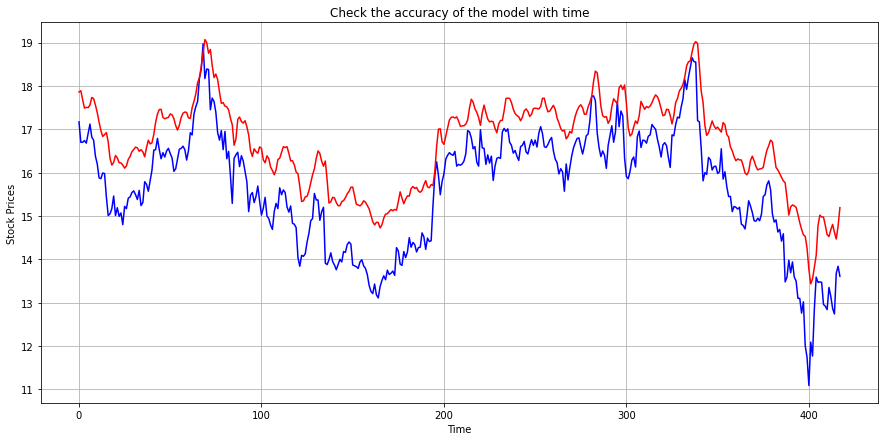

In [78]:
# Ploting the graph of stock prices with time - Training Data
print("Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices")
plt.rcParams["figure.figsize"] = (15,7)
plt.plot(trainY  , 'b')
plt.plot(train_pred, 'r')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.title('Check the accuracy of the model with time')
plt.grid(True)
plt.show()



In [79]:
stocks_pred = model.predict(stocksX)
stocks_pred = scaler.inverse_transform(stocks_pred)
stocksY = stocksY.reshape(stocksY.shape[0] , 1)
stocksY = scaler.inverse_transform(stocksY)
print ('Display Accuracy Training Data')
display (r2_score(stocksY,stocks_pred))


Display Accuracy Training Data


0.21486868970688977

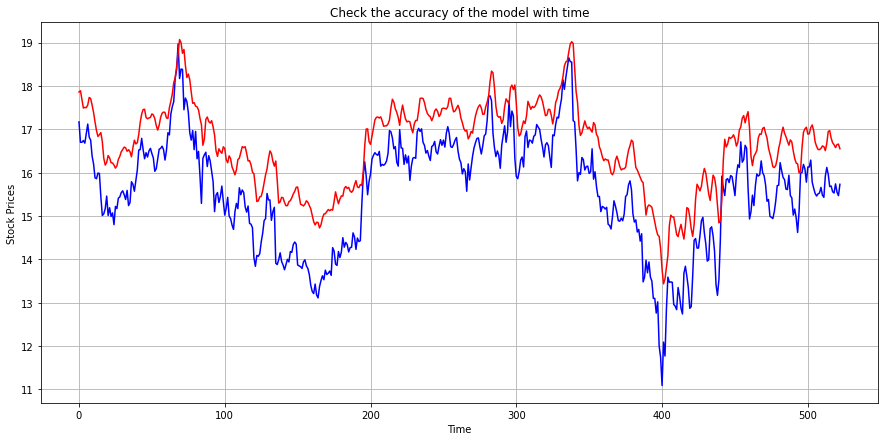

In [80]:
plt.rcParams["figure.figsize"] = (15,7)
plt.plot(stocksY  , 'b')
plt.plot(stocks_pred, 'r')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.title('Check the accuracy of the model with time')
plt.grid(True)
plt.show()


In [81]:
# Extract the data related to company - YHOO
results= df[df.symbol.isin (['YHOO'])]
# Update the data frame starting with 2nd records , since first prediction is for 2nd record
results= results [2:]
# Reset the index 0, 1,2 etc
results = results.reset_index(drop=True)
# Convert Predicted Value to Data Frame
df_stocks_pred= pd.DataFrame(stocks_pred, columns = ['Close_Prediction'])
# Concat Original and prediction data
results= pd.concat([results,df_stocks_pred],axis =1)
results.to_excel('results.xlsx')
display(results)


,date,symbol,open,close,low,high,volume,Close_Prediction
0,2010-01-06,YHOO,17.170000,17.170000,17.070000,17.299999,16422000.0,17.858646
1,2010-01-07,YHOO,16.809999,16.700001,16.570000,16.900000,31816300.0,17.888697
2,2010-01-08,YHOO,16.680000,16.700001,16.620001,16.760000,15470000.0,17.681705
3,2010-01-11,YHOO,16.770000,16.740000,16.480000,16.830000,16181900.0,17.489553
4,2010-01-12,YHOO,16.650000,16.680000,16.600000,16.860001,15672400.0,17.505018
...,...,...,...,...,...,...,...,...
518,2012-01-26,YHOO,15.630000,15.530000,15.420000,15.690000,15408400.0,16.641731
519,2012-01-27,YHOO,15.500000,15.740000,15.460000,15.800000,10859000.0,16.577913
520,2012-01-30,YHOO,15.610000,15.550000,15.500000,15.650000,11076900.0,16.646011
521,2012-01-31,YHOO,15.540000,15.470000,15.410000,15.620000,10725500.0,16.658066
